In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Read CSV file
Tokyo_Airbnb_df = pd.read_csv("Resources/updated_summarylist.csv")
Tokyo_Airbnb_df

,id,name,neighbourhood,latitude,longitude,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,ratings,bedrooms,beds,baths
0,197677,Rental unit in Sumida,Sumida Ku,35.717070,139.826080,964081,Yoshimi & Marek,Entire home/apt,11000,3,173,1.21,24,4.78,1.0,2.0,1.0
1,776070,Home in Kita-ku,Kita Ku,35.738440,139.769170,801494,Kei,Private room,7208,3,243,1.89,67,4.98,1.0,1.0,1.0
2,3427384,Rental unit in Edogawa,Edogawa Ku,35.683740,139.859710,13018876,Masakatsu,Entire home/apt,7847,2,100,0.93,231,4.82,1.0,2.0,1.0
3,905944,Rental unit in Shibuya,Shibuya Ku,35.678780,139.678470,4847803,Best Stay In Tokyo!,Entire home/apt,23066,3,186,1.49,229,4.76,2.0,4.0,1.0
4,3514008,Rental unit in Arakawa-ku,Arakawa Ku,35.726720,139.782010,17694529,Hisao,Entire home/apt,2871,1,269,2.59,11,4.86,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,913536451520424818,Rental unit in Sumida City,Sumida Ku,35.704935,139.804296,500855936,Tomohiro,Entire home/apt,11855,2,1,1.00,346,NaN,1.0,5.0,1.0
8109,913660262216995906,Rental unit in Shinjuku City,Shinjuku Ku,35.703653,139.701290,262580734,Riko,Entire home/apt,16429,5,1,1.00,145,NaN,2.0,3.0,1.0
8110,914001948186290663,Rental unit in Toshima City,Toshima Ku,35.730016,139.727183,93120690,Atsunobu,Entire home/apt,9510,1,1,1.00,261,NaN,1.0,1.0,1.0
8111,918757671248742571,Rental unit in Shibuya City,Shibuya Ku,35.666490,139.685037,509679682,Johnathan,Entire home/apt,17886,2,1,1.00,140,NaN,NaN,1.0,1.0


In [3]:
#Count the nukmber of neighbourhoods 
name_count = Tokyo_Airbnb_df['neighbourhood'].nunique()
name_count

46

In [4]:
#select top 15 neighborhouds by count to produce a heat map in seaborn 
# top_15_neighborhoods = Tokyo_Airbnb_df['neighbourhood'].value_counts().sort_values(ascending=False).head(15)
neighborhood_counts = Tokyo_Airbnb_df['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'count']
Tokyo_Airbnb_df_with_counts = Tokyo_Airbnb_df.merge(neighborhood_counts, on='neighbourhood', how='left')
top_15_neighborhoods_list = neighborhood_counts.head(15)['neighbourhood']
top_15_neighborhoods = Tokyo_Airbnb_df_with_counts[Tokyo_Airbnb_df_with_counts['neighbourhood'].isin(top_15_neighborhoods_list)]
 

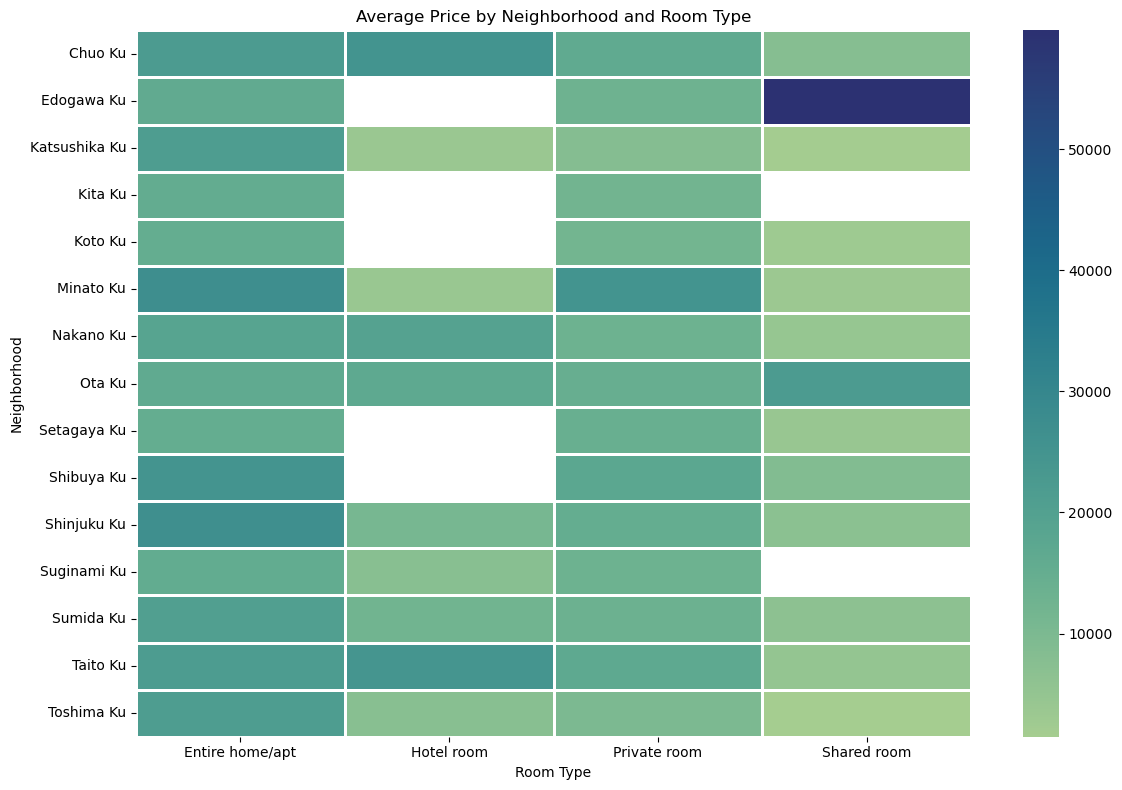

In [5]:
# Generate a heat map for neighbourhood, room type, and price relation
neighbourhood_roomtype_price = top_15_neighborhoods.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')

#Create a fig size, adjust the layout, and save the png file
plt.figure(figsize=(12, 8))
sns.heatmap(neighbourhood_roomtype_price, cmap='crest', linewidths=.75)
plt.title('Average Price by Neighborhood and Room Type')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.savefig('Resources/HeatMapTop15AveragePricebyNeighbourhoodandRoomType.png', format='png')
plt.show()

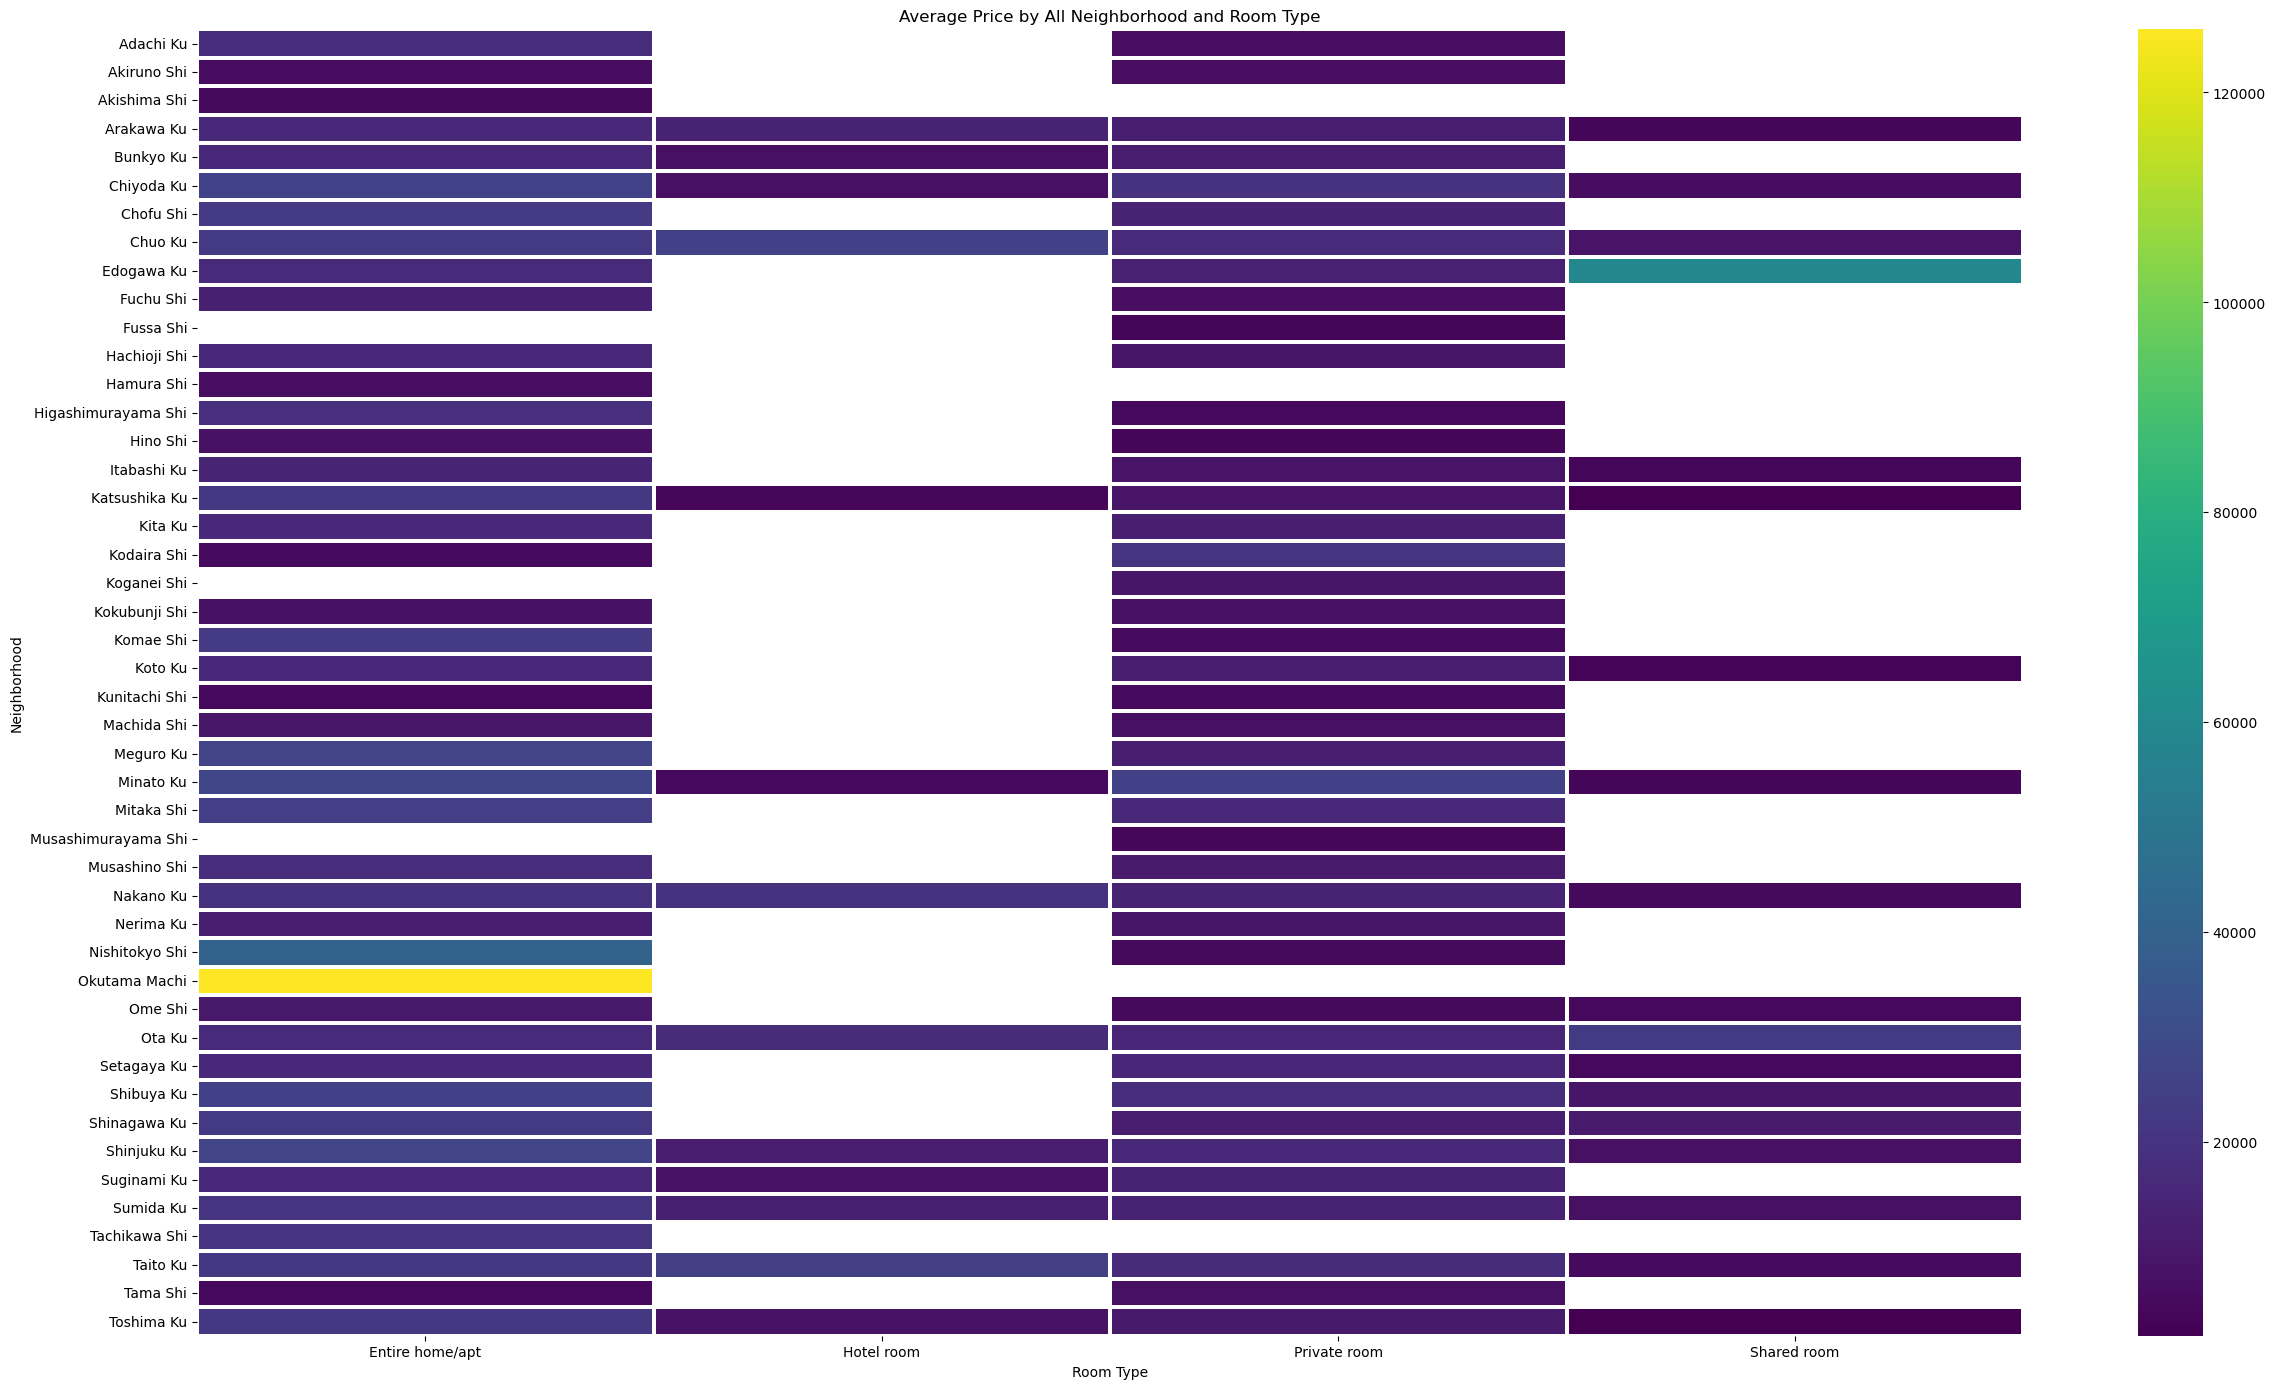

In [6]:
# Generate a heat map for neighbourhood, room type, and price relation
all_neighbourhood_roomtype_price = Tokyo_Airbnb_df.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')

#Create a fig size, adjust the layout, and save the png file
plt.figure(figsize=(25, 14))
sns.heatmap(all_neighbourhood_roomtype_price, cmap='viridis', linewidths=1.5)
plt.title('Average Price by All Neighborhood and Room Type')
plt.tight_layout()
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.savefig('Resources/HeatMapAllAveragePricebyNeighbourhoodandRoomType.png', format='png')
plt.show()

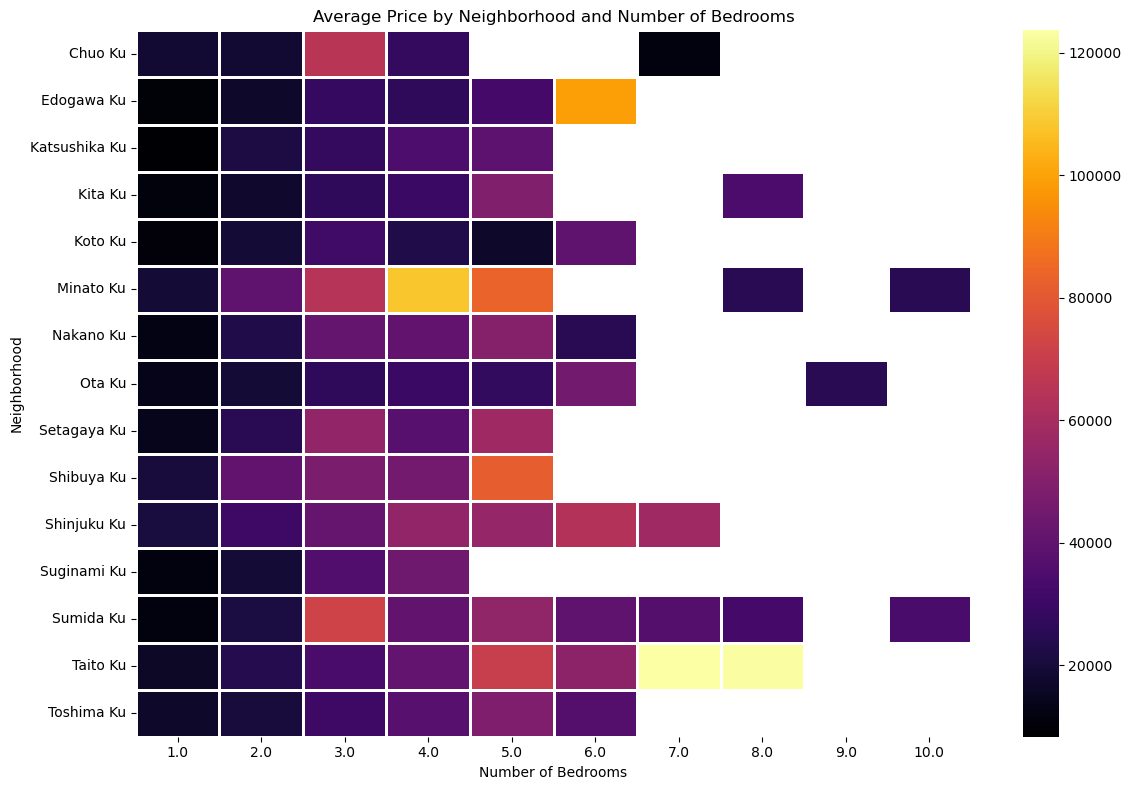

In [7]:
# Generate a heat map for neighbourhood, number of beddrooms, and price relation
bedroomstype_price = top_15_neighborhoods.pivot_table(index='neighbourhood', columns='bedrooms', values='price', aggfunc='mean')
# Create a fig size, adjust the layout, and save the png file
plt.figure(figsize=(12, 8))
sns.heatmap(bedroomstype_price, cmap='inferno', linewidths=.75)
plt.title('Average Price by Neighborhood and Number of Bedrooms')
plt.tight_layout()
plt.xlabel('Number of Bedrooms')
plt.ylabel('Neighborhood')
plt.savefig('Resources/HeatMapTop15AveragePricebyNeighborhoodandBedrooms.png', format='png')
plt.show()